In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/PYTHON/PYTHON PROYECTO/shopify_customers_dataset.csv', sep=',' )
orders = pd.read_csv('/content/drive/MyDrive/PYTHON/PYTHON PROYECTO/shopify_orders_dataset.csv', sep=',' )
products = pd.read_csv('/content/drive/MyDrive/PYTHON/PYTHON PROYECTO/shopify_products_dataset.csv', sep=',' )
sellers = pd.read_csv('/content/drive/MyDrive/PYTHON/PYTHON PROYECTO/shopify_sellers_dataset.csv', sep=',' )
order_payment = pd.read_csv('/content/drive/MyDrive/PYTHON/PYTHON PROYECTO/shopify_order_payments_dataset 2.csv', sep=',' )
category = pd.read_csv('/content/drive/MyDrive/PYTHON/PYTHON PROYECTO/shopify_category_name_translation.csv', sep=',' )
geolocation = pd.read_csv('/content/drive/MyDrive/PYTHON/PYTHON PROYECTO/shopify_geolocation_dataset.csv', sep=',' )
order_items = pd.read_csv('/content/drive/MyDrive/PYTHON/PYTHON PROYECTO/shopify_order_items_dataset.csv', sep=',' )


In [ ]:
customer.info()
customer.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


In [ ]:
orders.info()
orders.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


In [ ]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
#eliminar columnas que tienen ordenes no entregadas
orders.dropna(subset=['order_delivered_customer_date', 'order_delivered_carrier_date', 'order_approved_at'], inplace=True)
#eliminar ordenes canceladas
orders.drop(orders[orders['order_status'] == 'canceled'].index, inplace=True)


In [ ]:
##con customer_unique_id tengo que hacer los análisis
##con customer_id hago el merge
orders_customer = pd.merge(orders, customer, on='customer_id', how='left')
orders_customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
 8   customer_unique_id             96455 non-null  object
 9   customer_zip_code_prefix       96455 non-null  int64 
 10  customer_city                  96455 non-null  object
 11  customer_state                 96455 non-null  object
dtypes: int64(1), object(11)
memory usage: 8.8+ MB


In [ ]:
orders_customer['order_purchase_timestamp'] = pd.to_datetime(orders_customer['order_purchase_timestamp'])
orders_customer.info()
orders_customer['order_purchase_timestamp'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  object        
 5   order_delivered_carrier_date   96455 non-null  object        
 6   order_delivered_customer_date  96455 non-null  object        
 7   order_estimated_delivery_date  96455 non-null  object        
 8   customer_unique_id             96455 non-null  object        
 9   customer_zip_code_prefix       96455 non-null  int64         
 10  customer_city                  96455 non-null  object        
 11  customer_state 

,order_purchase_timestamp
count,96455
mean,2018-01-02 00:26:23.673806336
min,2016-09-15 12:16:38
25%,2017-09-14 09:39:02.500000
50%,2018-01-20 20:00:12
75%,2018-05-05 18:53:33
max,2018-08-29 15:00:37


In [ ]:
orders_customer['last_order_date'] = orders_customer.groupby('customer_unique_id')['order_purchase_timestamp'].transform('max')
orders_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  object        
 5   order_delivered_carrier_date   96455 non-null  object        
 6   order_delivered_customer_date  96455 non-null  object        
 7   order_estimated_delivery_date  96455 non-null  object        
 8   customer_unique_id             96455 non-null  object        
 9   customer_zip_code_prefix       96455 non-null  int64         
 10  customer_city                  96455 non-null  object        
 11  customer_state 

In [ ]:
order_payment.info()
order_payment.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,0
order_id,99440
payment_sequential,29
payment_type,5
payment_installments,24
payment_value,29077


In [ ]:
##agrupar order_id para sacar el valor de la compra total por factura
order_payment_total = order_payment.groupby('order_id')['payment_value'].sum().reset_index()
order_payment_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       99440 non-null  object 
 1   payment_value  99440 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
##unir tablas para tener orden, cliente, total de la orden
orders_customer_payment= pd.merge(orders_customer,order_payment_total , on='order_id', how='inner')
orders_customer_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96454 entries, 0 to 96453
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96454 non-null  object        
 1   customer_id                    96454 non-null  object        
 2   order_status                   96454 non-null  object        
 3   order_purchase_timestamp       96454 non-null  datetime64[ns]
 4   order_approved_at              96454 non-null  object        
 5   order_delivered_carrier_date   96454 non-null  object        
 6   order_delivered_customer_date  96454 non-null  object        
 7   order_estimated_delivery_date  96454 non-null  object        
 8   customer_unique_id             96454 non-null  object        
 9   customer_zip_code_prefix       96454 non-null  int64         
 10  customer_city                  96454 non-null  object        
 11  customer_state 

In [ ]:
##agrupar por customer_unique_id, contar la cantidad unica de ordenes, sumar los payment_value y asignar el last_order_date

In [ ]:
customer_orders_total = orders_customer_payment.groupby('customer_unique_id').agg({'order_id': 'nunique', 'payment_value': 'sum', 'last_order_date': 'max'}).reset_index()
customer_orders_total['recencia'] = (orders_customer_payment['order_purchase_timestamp'].max() - customer_orders_total['last_order_date']).dt.days
customer_orders_total.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93335 entries, 0 to 93334
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  93335 non-null  object        
 1   order_id            93335 non-null  int64         
 2   payment_value       93335 non-null  float64       
 3   last_order_date     93335 non-null  datetime64[ns]
 4   recencia            93335 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.6+ MB


In [ ]:
customer_orders_total.columns = ['customer_unique_id', 'frecuencia', 'monto', 'last_order_date','recencia']
customer_orders_total.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93335 entries, 0 to 93334
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  93335 non-null  object        
 1   frecuencia          93335 non-null  int64         
 2   monto               93335 non-null  float64       
 3   last_order_date     93335 non-null  datetime64[ns]
 4   recencia            93335 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.6+ MB


In [ ]:
customer_orders_total['R']= pd.qcut(customer_orders_total['recencia'], q=4)
customer_orders_total['F']= pd.qcut(customer_orders_total['frecuencia'], q=1)
customer_orders_total['M']= pd.qcut(customer_orders_total['monto'], q=4)
customer_orders_total

,customer_unique_id,frecuencia,monto,last_order_date,recencia,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,2018-05-10 10:56:27,111,"(-0.001, 113.0]","(0.999, 15.0]","(107.78, 182.545]"
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,2018-05-07 11:11:27,114,"(113.0, 218.0]","(0.999, 15.0]","(9.589, 63.05]"
2,0000f46a3911fa3c0805444483337064,1,86.22,2017-03-10 21:05:03,536,"(345.0, 694.0]","(0.999, 15.0]","(63.05, 107.78]"
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,2017-10-12 20:29:41,320,"(218.0, 345.0]","(0.999, 15.0]","(9.589, 63.05]"
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,2017-11-14 19:45:42,287,"(218.0, 345.0]","(0.999, 15.0]","(182.545, 13664.08]"
...,...,...,...,...,...,...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,2017-06-08 21:00:36,446,"(345.0, 694.0]","(0.999, 15.0]","(182.545, 13664.08]"
93331,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,2017-12-10 20:07:56,261,"(218.0, 345.0]","(0.999, 15.0]","(63.05, 107.78]"
93332,ffff371b4d645b6ecea244b27531430a,1,112.46,2017-02-07 15:49:16,567,"(345.0, 694.0]","(0.999, 15.0]","(107.78, 182.545]"
93333,ffff5962728ec6157033ef9805bacc48,1,133.69,2018-05-02 15:17:41,118,"(113.0, 218.0]","(0.999, 15.0]","(107.78, 182.545]"


In [ ]:
customer_orders_total['R_label']= pd.qcut(customer_orders_total['recencia'], q=4,labels=["4","3","2","1"])
customer_orders_total['F_label']= pd.qcut(customer_orders_total['frecuencia'], q=1,labels=["1"])
customer_orders_total['M_label']= pd.qcut(customer_orders_total['monto'], q=4,labels=["1","2","3","4"])
customer_orders_total

,customer_unique_id,frecuencia,monto,last_order_date,recencia,R,F,M,R_label,F_label,M_label
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,2018-05-10 10:56:27,111,"(-0.001, 113.0]","(0.999, 15.0]","(107.78, 182.545]",4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,2018-05-07 11:11:27,114,"(113.0, 218.0]","(0.999, 15.0]","(9.589, 63.05]",3,1,1
2,0000f46a3911fa3c0805444483337064,1,86.22,2017-03-10 21:05:03,536,"(345.0, 694.0]","(0.999, 15.0]","(63.05, 107.78]",1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,2017-10-12 20:29:41,320,"(218.0, 345.0]","(0.999, 15.0]","(9.589, 63.05]",2,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,2017-11-14 19:45:42,287,"(218.0, 345.0]","(0.999, 15.0]","(182.545, 13664.08]",2,1,4
...,...,...,...,...,...,...,...,...,...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,2017-06-08 21:00:36,446,"(345.0, 694.0]","(0.999, 15.0]","(182.545, 13664.08]",1,1,4
93331,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,2017-12-10 20:07:56,261,"(218.0, 345.0]","(0.999, 15.0]","(63.05, 107.78]",2,1,2
93332,ffff371b4d645b6ecea244b27531430a,1,112.46,2017-02-07 15:49:16,567,"(345.0, 694.0]","(0.999, 15.0]","(107.78, 182.545]",1,1,3
93333,ffff5962728ec6157033ef9805bacc48,1,133.69,2018-05-02 15:17:41,118,"(113.0, 218.0]","(0.999, 15.0]","(107.78, 182.545]",3,1,3


In [ ]:
customer_orders_total['frecuencia'].unique()

#1 =1
#2-3 =2
#4-7 = 3
#9-15 = 4

array([ 1,  2,  3,  4,  6,  7,  5,  9, 15])

In [ ]:
## Asignar la frecuencia en función de definición del negocio.
def categorizar_frecuencia(frecuencia):
  if frecuencia == 1:
    return 1
  elif 2 <= frecuencia <= 3:
    return 2
  elif 4 <= frecuencia <= 7:
    return 3
  elif 9 <= frecuencia <= 15:
    return 4
  else:
    return None

customer_orders_total['categoria_frecuencia'] = customer_orders_total['frecuencia'].apply(categorizar_frecuencia)
customer_orders_total

,customer_unique_id,frecuencia,monto,last_order_date,recencia,R,F,M,R_label,F_label,M_label,categoria_frecuencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,2018-05-10 10:56:27,111,"(-0.001, 113.0]","(0.999, 15.0]","(107.78, 182.545]",4,1,3,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,2018-05-07 11:11:27,114,"(113.0, 218.0]","(0.999, 15.0]","(9.589, 63.05]",3,1,1,1
2,0000f46a3911fa3c0805444483337064,1,86.22,2017-03-10 21:05:03,536,"(345.0, 694.0]","(0.999, 15.0]","(63.05, 107.78]",1,1,2,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,2017-10-12 20:29:41,320,"(218.0, 345.0]","(0.999, 15.0]","(9.589, 63.05]",2,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,2017-11-14 19:45:42,287,"(218.0, 345.0]","(0.999, 15.0]","(182.545, 13664.08]",2,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,2017-06-08 21:00:36,446,"(345.0, 694.0]","(0.999, 15.0]","(182.545, 13664.08]",1,1,4,1
93331,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,2017-12-10 20:07:56,261,"(218.0, 345.0]","(0.999, 15.0]","(63.05, 107.78]",2,1,2,1
93332,ffff371b4d645b6ecea244b27531430a,1,112.46,2017-02-07 15:49:16,567,"(345.0, 694.0]","(0.999, 15.0]","(107.78, 182.545]",1,1,3,1
93333,ffff5962728ec6157033ef9805bacc48,1,133.69,2018-05-02 15:17:41,118,"(113.0, 218.0]","(0.999, 15.0]","(107.78, 182.545]",3,1,3,1


In [ ]:
customer_orders_total['RFM']=customer_orders_total['R_label'].astype(str)+customer_orders_total['categoria_frecuencia'].astype(str)+customer_orders_total['M_label'].astype(str)
customer_orders_total

,customer_unique_id,frecuencia,monto,last_order_date,recencia,R,F,M,R_label,F_label,M_label,categoria_frecuencia,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,2018-05-10 10:56:27,111,"(-0.001, 113.0]","(0.999, 15.0]","(107.78, 182.545]",4,1,3,1,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,2018-05-07 11:11:27,114,"(113.0, 218.0]","(0.999, 15.0]","(9.589, 63.05]",3,1,1,1,311
2,0000f46a3911fa3c0805444483337064,1,86.22,2017-03-10 21:05:03,536,"(345.0, 694.0]","(0.999, 15.0]","(63.05, 107.78]",1,1,2,1,112
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,2017-10-12 20:29:41,320,"(218.0, 345.0]","(0.999, 15.0]","(9.589, 63.05]",2,1,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,2017-11-14 19:45:42,287,"(218.0, 345.0]","(0.999, 15.0]","(182.545, 13664.08]",2,1,4,1,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93330,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,2017-06-08 21:00:36,446,"(345.0, 694.0]","(0.999, 15.0]","(182.545, 13664.08]",1,1,4,1,114
93331,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,2017-12-10 20:07:56,261,"(218.0, 345.0]","(0.999, 15.0]","(63.05, 107.78]",2,1,2,1,212
93332,ffff371b4d645b6ecea244b27531430a,1,112.46,2017-02-07 15:49:16,567,"(345.0, 694.0]","(0.999, 15.0]","(107.78, 182.545]",1,1,3,1,113
93333,ffff5962728ec6157033ef9805bacc48,1,133.69,2018-05-02 15:17:41,118,"(113.0, 218.0]","(0.999, 15.0]","(107.78, 182.545]",3,1,3,1,313


In [ ]:
customer_orders_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93335 entries, 0 to 93334
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_unique_id    93335 non-null  object        
 1   frecuencia            93335 non-null  int64         
 2   monto                 93335 non-null  float64       
 3   last_order_date       93335 non-null  datetime64[ns]
 4   recencia              93335 non-null  int64         
 5   R                     93335 non-null  category      
 6   F                     93335 non-null  category      
 7   M                     93335 non-null  category      
 8   R_label               93335 non-null  category      
 9   F_label               93335 non-null  category      
 10  M_label               93335 non-null  category      
 11  categoria_frecuencia  93335 non-null  int64         
 12  RFM                   93335 non-null  object        
dtypes: category(6), 

In [ ]:
customer_orders_total.R_label = customer_orders_total.R_label.astype(int)
customer_orders_total.F_label = customer_orders_total.F_label.astype(int)
customer_orders_total.M_label = customer_orders_total.M_label.astype(int)

In [ ]:
##Definir la clasificación de los clientes en función de las combinaciones de R,F,M

In [ ]:
def clasificacion_cliente(row):
    r, f, m = row["R_label"], row["categoria_frecuencia"], row["M_label"]

    # Clientes TOP: alto en todo
    if r >= 3 and f >= 3 and m >= 3:
        return "Clientes TOP"

    # Potenciales: buena recencia y monto, frecuencia media/baja
    elif r >= 3 and f <= 2 and m >= 3:
        return "Clientes potenciales"

    # Recientes: recencia alta, F y M bajos/medios
    elif r == 4 and f <= 2 and m <= 2:
        return "Clientes recientes"

    # Alta frecuencia: frecuencia alta, R y M bajos/medios
    elif f == 4 and r <= 2 and m <= 2:
        return "Clientes alta frecuencia"

    # Monto alto: monto alto, R y F bajos/medios
    elif m == 4 and r <= 2 and f <= 2:
        return "Clientes monto alto"

    # Perdidos: muy baja recencia y F/M bajos
    elif r == 1 and f <= 2 and m <= 2:
        return "Clientes perdidos"

    # Nuevos de alto valor: recencia alta (4) y al menos un valor alto en F o M
    elif r == 4 and (f >= 3 or m >= 3):
        return "Clientes nuevos de alto valor"

    # Frecuencia moderada y monto alto: F=3, M≥3
    elif f == 3 and m >= 3:
        return "Clientes buenos gastadores"

    # Recencia moderada y frecuencia alta
    elif r >= 2 and f >= 3:
        return "Clientes recurrentes"

    # Si no entra en nada anterior
    else:
        return "Clientes intermedios"


In [ ]:
customer_orders_total['categoria_cliente'] = customer_orders_total.apply(clasificacion_cliente, axis=1)
customer_orders_total.head(3)


,customer_unique_id,frecuencia,monto,last_order_date,recencia,R,F,M,R_label,F_label,M_label,categoria_frecuencia,RFM,categoria_cliente
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,2018-05-10 10:56:27,111,"(-0.001, 113.0]","(0.999, 15.0]","(107.78, 182.545]",4,1,3,1,413,Clientes potenciales
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,2018-05-07 11:11:27,114,"(113.0, 218.0]","(0.999, 15.0]","(9.589, 63.05]",3,1,1,1,311,Clientes intermedios
2,0000f46a3911fa3c0805444483337064,1,86.22,2017-03-10 21:05:03,536,"(345.0, 694.0]","(0.999, 15.0]","(63.05, 107.78]",1,1,2,1,112,Clientes perdidos


In [ ]:
customer_orders_total.to_excel('customer_orders_total.xlsx', index=False)

In [ ]:
## cristi
customer_orders_total['categoria_cliente'].unique()

array(['Clientes potenciales', 'Clientes intermedios',
       'Clientes perdidos', 'Clientes monto alto', 'Clientes recientes',
       'Clientes TOP', 'Clientes buenos gastadores'], dtype=object)

In [ ]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
## Gráficos por ubicación del cliente
customer["customer_city"].unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [ ]:
customer['customer_city'] = customer['customer_city'].str.title()
orders_customer['customer_city'] = orders_customer['customer_city'].str.title()
orders_customer_payment['customer_city'] = orders_customer_payment['customer_city'].str.title()

In [ ]:
customer["customer_state"].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

/tmp/ipython-input-799836220.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='payment_value', data=top_5_states, palette='viridis')


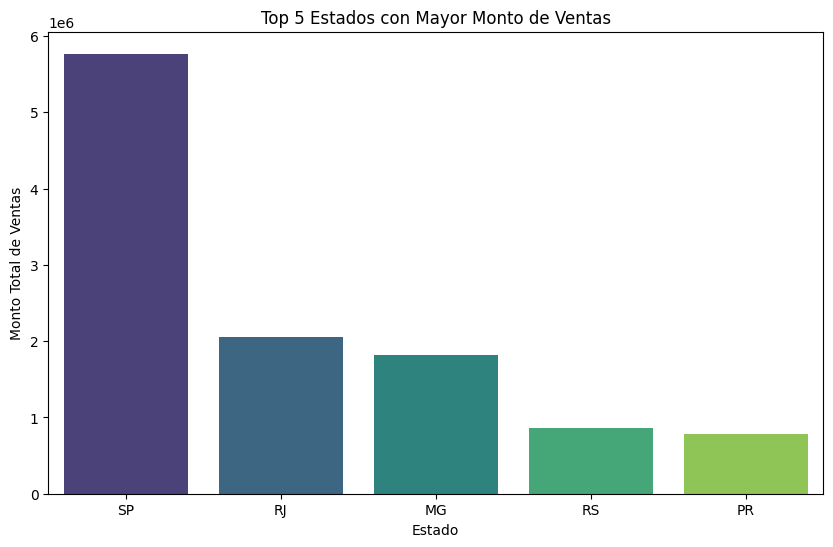

In [ ]:
##1. Top 5 de los estados con mayor monto en ventas - ok

state_monto = orders_customer_payment.groupby('customer_state')['payment_value'].sum().reset_index()
top_5_states = state_monto.nlargest(5, 'payment_value')

plt.figure(figsize=(10, 6))
sns.barplot(x='customer_state', y='payment_value', data=top_5_states, palette='viridis')
plt.title('Top 5 Estados con Mayor Monto de Ventas')
plt.xlabel('Estado')
plt.ylabel('Monto Total de Ventas')
plt.show()

/tmp/ipython-input-647752057.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_city', y='payment_value', data=top_5_states, palette='viridis')


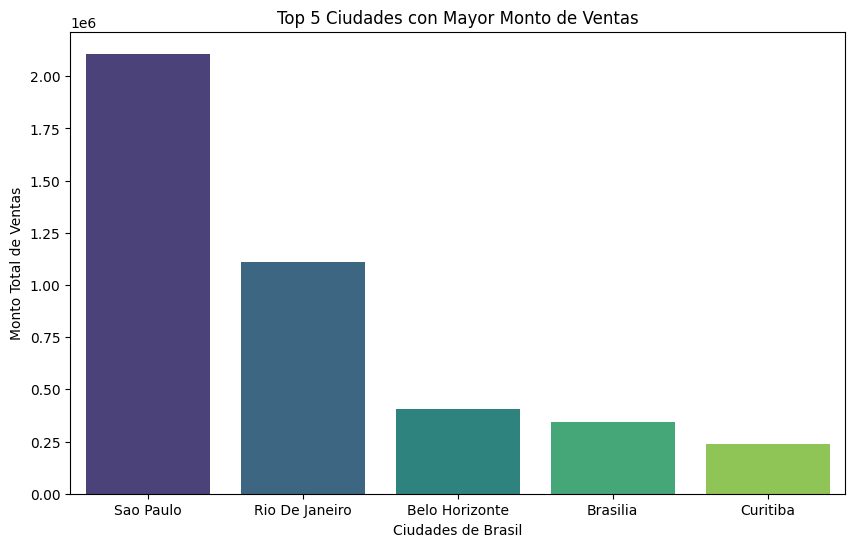

In [ ]:
##2. Top 5 de las ciudades con mayor monto en ventas - ok

state_monto = orders_customer_payment.groupby('customer_city')['payment_value'].sum().reset_index()
top_5_states = state_monto.nlargest(5, 'payment_value')

plt.figure(figsize=(10, 6))
sns.barplot(x='customer_city', y='payment_value', data=top_5_states, palette='viridis')
plt.title('Top 5 Ciudades con Mayor Monto de Ventas')
plt.xlabel('Ciudades de Brasil')
plt.ylabel('Monto Total de Ventas')
plt.show()

/tmp/ipython-input-1336363890.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_city', y='payment_value', data=top_cities_sp, palette='viridis')


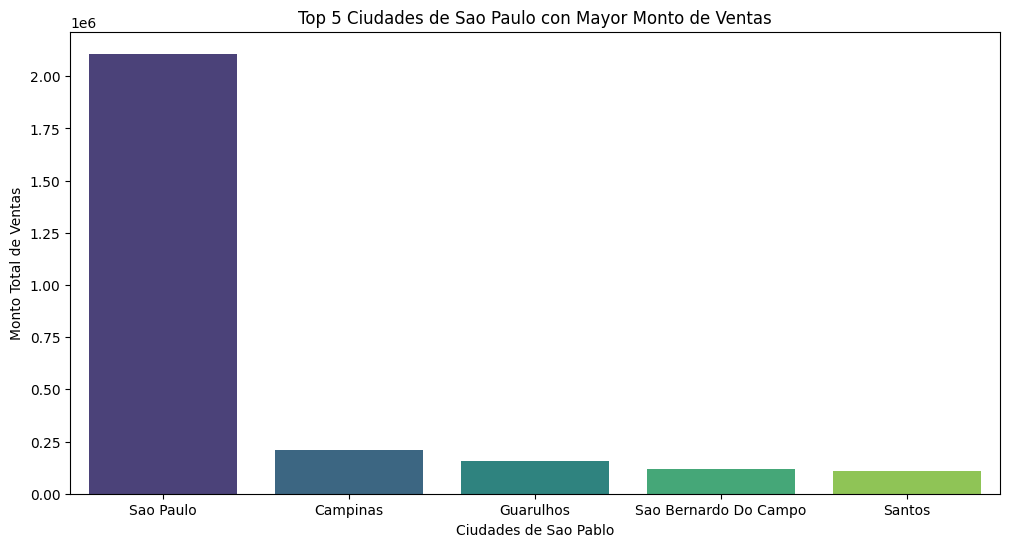

In [ ]:
## 3. Ventas por ciudad del State SP - ok
sp_orders = orders_customer_payment[orders_customer_payment['customer_state'] == 'SP']
city_monto_sp = sp_orders.groupby('customer_city')['payment_value'].sum().reset_index()
top_cities_sp = city_monto_sp.nlargest(5, 'payment_value')

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='payment_value', data=top_cities_sp, palette='viridis')
plt.title('Top 5 Ciudades de Sao Paulo con Mayor Monto de Ventas')
plt.xlabel('Ciudades de Sao Pablo')
plt.ylabel('Monto Total de Ventas')
plt.show()

/tmp/ipython-input-1656562341.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_cliente', y='count', data=category_counts_sp, palette='viridis')


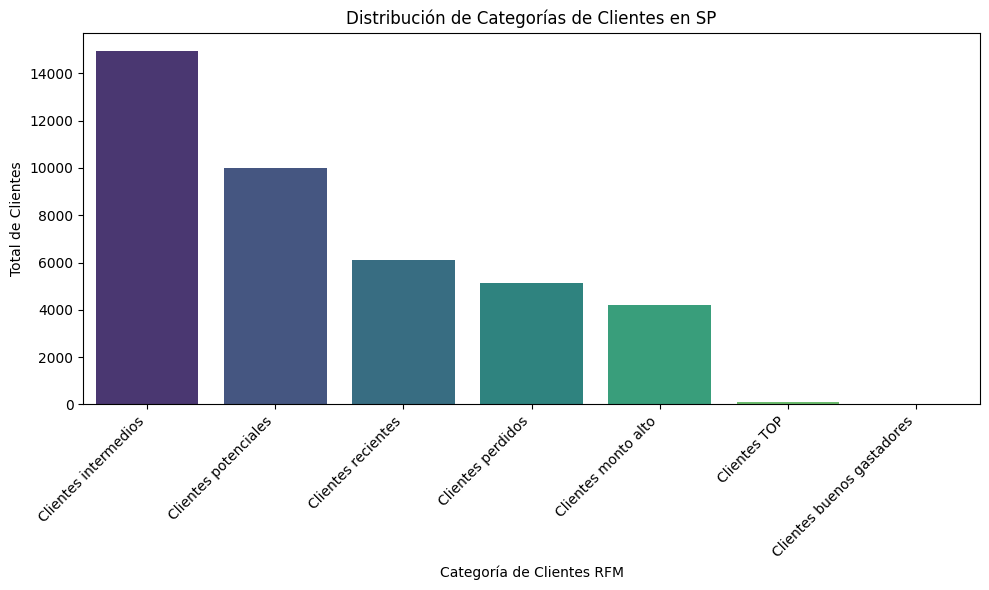

In [ ]:
##4. Categoria cliente por State SP - ok

# Filter orders for customers in SP state
sp_customer_orders = orders_customer_payment[orders_customer_payment['customer_state'] == 'SP']

# Merge with customer_orders_total to get customer categories
sp_customer_categories = pd.merge(sp_customer_orders, customer_orders_total[['customer_unique_id', 'categoria_cliente']], on='customer_unique_id', how='left')

# Count the occurrences of each customer category
category_counts_sp = sp_customer_categories['categoria_cliente'].value_counts().reset_index()
category_counts_sp.columns = ['categoria_cliente', 'count']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='categoria_cliente', y='count', data=category_counts_sp, palette='viridis')
plt.title('Distribución de Categorías de Clientes en SP')
plt.xlabel('Categoría de Clientes RFM')
plt.ylabel('Total de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2947590990.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categoria_cliente', y='count', data=category_counts_sao_paulo, palette='viridis')


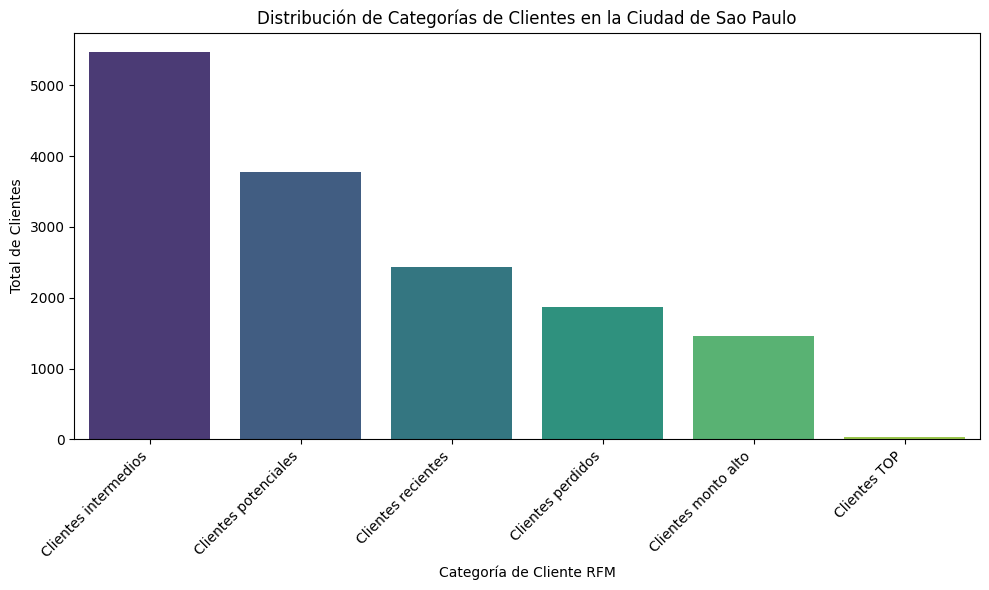

In [ ]:
## Categoria cliente por ciudad Sao Pablo

# Filter orders for customers in "sao paulo" city
sao_paulo_customer_orders = orders_customer_payment[orders_customer_payment['customer_city'] == 'Sao Paulo']

# Merge with customer_orders_total to get customer categories
sao_paulo_customer_categories = pd.merge(sao_paulo_customer_orders, customer_orders_total[['customer_unique_id', 'categoria_cliente']], on='customer_unique_id', how='left')

# Count the occurrences of each customer category
category_counts_sao_paulo = sao_paulo_customer_categories['categoria_cliente'].value_counts().reset_index()
category_counts_sao_paulo.columns = ['categoria_cliente', 'count']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='categoria_cliente', y='count', data=category_counts_sao_paulo, palette='viridis')
plt.title('Distribución de Categorías de Clientes en la Ciudad de Sao Paulo')
plt.xlabel('Categoría de Cliente RFM')
plt.ylabel('Total de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1855228319.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_city', y='count', data=top_cities_monto_alto, palette='viridis')


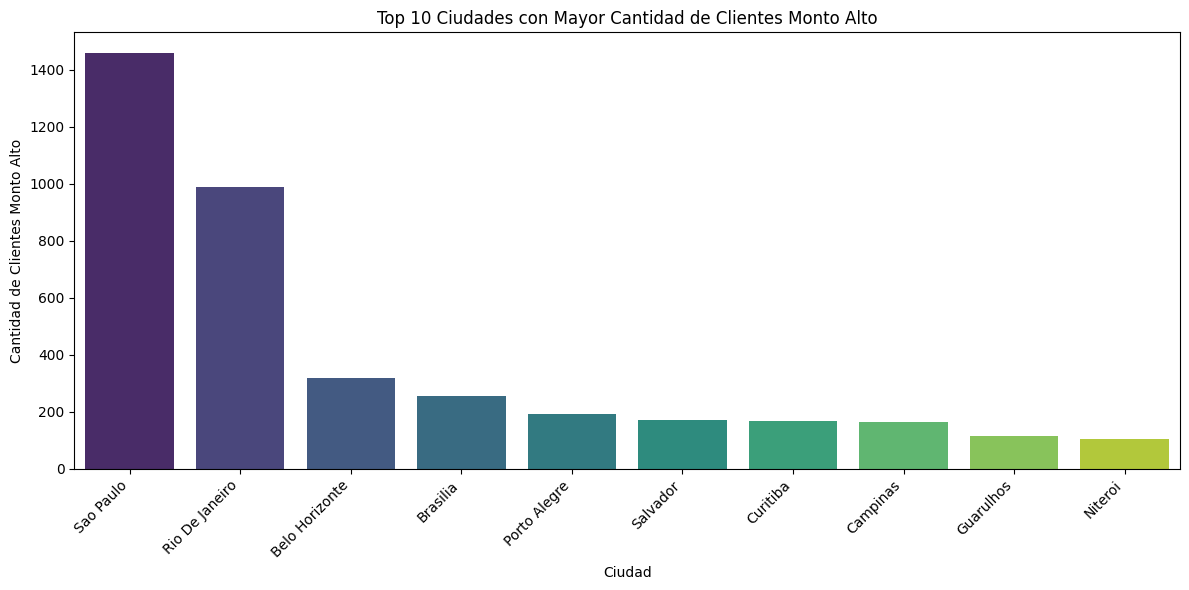

In [ ]:
## Ciudades con mayor cantidad de clientes monto alto - REVISAR PROPORCIONALIDAD

# Filter customer_orders_total for "Clientes monto alto"
clientes_monto_alto = customer_orders_total[customer_orders_total['categoria_cliente'] == 'Clientes monto alto']

# Merge with orders_customer_payment to get city information
clientes_monto_alto_city = pd.merge(clientes_monto_alto, orders_customer_payment[['customer_unique_id', 'customer_city']], on='customer_unique_id', how='left')

# Count the occurrences of each city for "Clientes monto alto"
city_counts_monto_alto = clientes_monto_alto_city['customer_city'].value_counts().reset_index()
city_counts_monto_alto.columns = ['customer_city', 'count']

# Select the top cities (e.g., top 10)
top_cities_monto_alto = city_counts_monto_alto.nlargest(10, 'count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='count', data=top_cities_monto_alto, palette='viridis')
plt.title('Top 10 Ciudades con Mayor Cantidad de Clientes Monto Alto')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Clientes Monto Alto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-876489803.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_city', y='count', data=top_cities_recientes, palette='viridis')


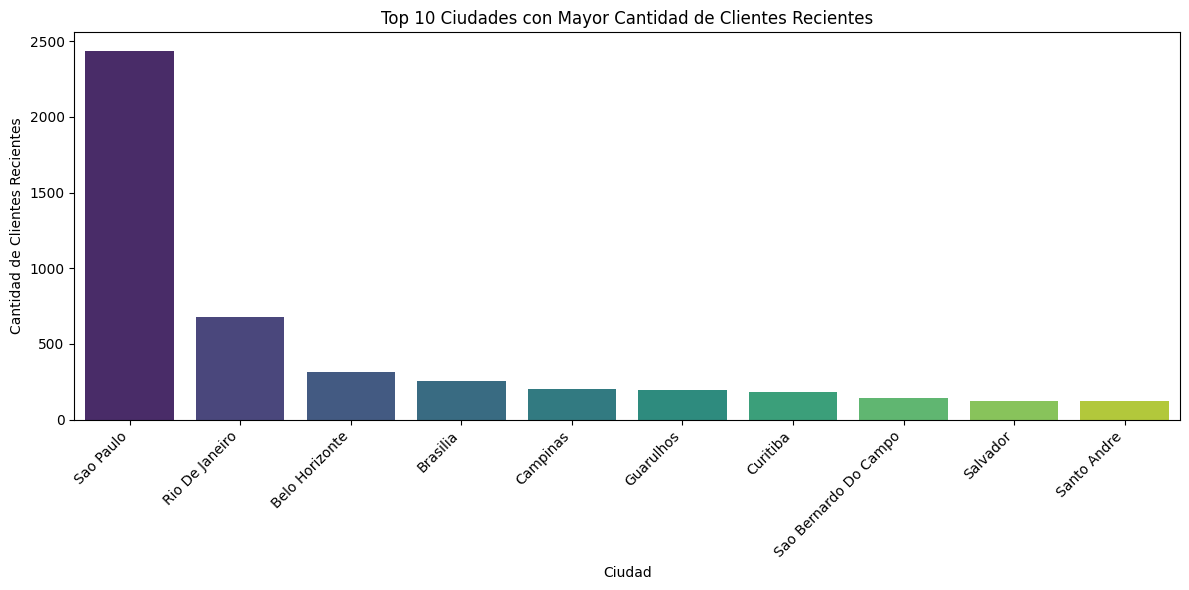

In [ ]:
## Ciudades con mayor cantidad de clientes recientes - Revisar Proporcionalidad

# Filter customer_orders_total for "Clientes recientes"
clientes_recientes = customer_orders_total[customer_orders_total['categoria_cliente'] == 'Clientes recientes']

# Merge with orders_customer_payment to get city information
clientes_recientes_city = pd.merge(clientes_recientes, orders_customer_payment[['customer_unique_id', 'customer_city']], on='customer_unique_id', how='left')

# Count the occurrences of each city for "Clientes recientes"
city_counts_recientes = clientes_recientes_city['customer_city'].value_counts().reset_index()
city_counts_recientes.columns = ['customer_city', 'count']

# Select the top cities (e.g., top 10)
top_cities_recientes = city_counts_recientes.nlargest(10, 'count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='count', data=top_cities_recientes, palette='viridis')
plt.title('Top 10 Ciudades con Mayor Cantidad de Clientes Recientes')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Clientes Recientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3899540965.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_city', y='count', data=top_cities_perdidos, palette='viridis')


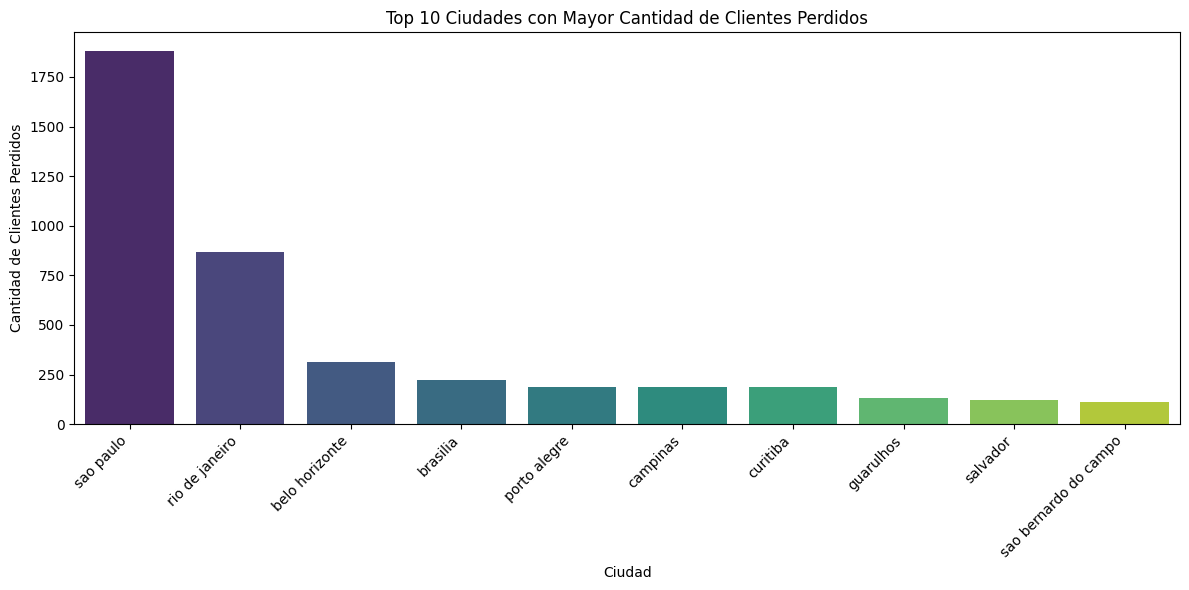

In [ ]:
## Ciudades con mayor cantidad de clientes perdidos - Revisar Proporcionalidad


# Filter customer_orders_total for "Clientes perdidos"
clientes_perdidos = customer_orders_total[customer_orders_total['categoria_cliente'] == 'Clientes perdidos']

# Merge with orders_customer_payment to get city information
clientes_perdidos_city = pd.merge(clientes_perdidos, orders_customer_payment[['customer_unique_id', 'customer_city']], on='customer_unique_id', how='left')

# Count the occurrences of each city for "Clientes perdidos"
city_counts_perdidos = clientes_perdidos_city['customer_city'].value_counts().reset_index()
city_counts_perdidos.columns = ['customer_city', 'count']

# Select the top cities (e.g., top 10)
top_cities_perdidos = city_counts_perdidos.nlargest(10, 'count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='count', data=top_cities_perdidos, palette='viridis')
plt.title('Top 10 Ciudades con Mayor Cantidad de Clientes Perdidos')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Clientes Perdidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
## Graficos por producto
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
category["product_category_name"] = category["product_category_name"].str.title()
category["product_category_name_english"] = category["product_category_name_english"].str.title()
category["product_category_name_english"] = category["product_category_name_english"].str.replace("_", " ")

In [ ]:
products["product_category_name"] = products["product_category_name"].str.title()


/tmp/ipython-input-69181580.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='total_sales', data=top_5_categories, palette='summer')


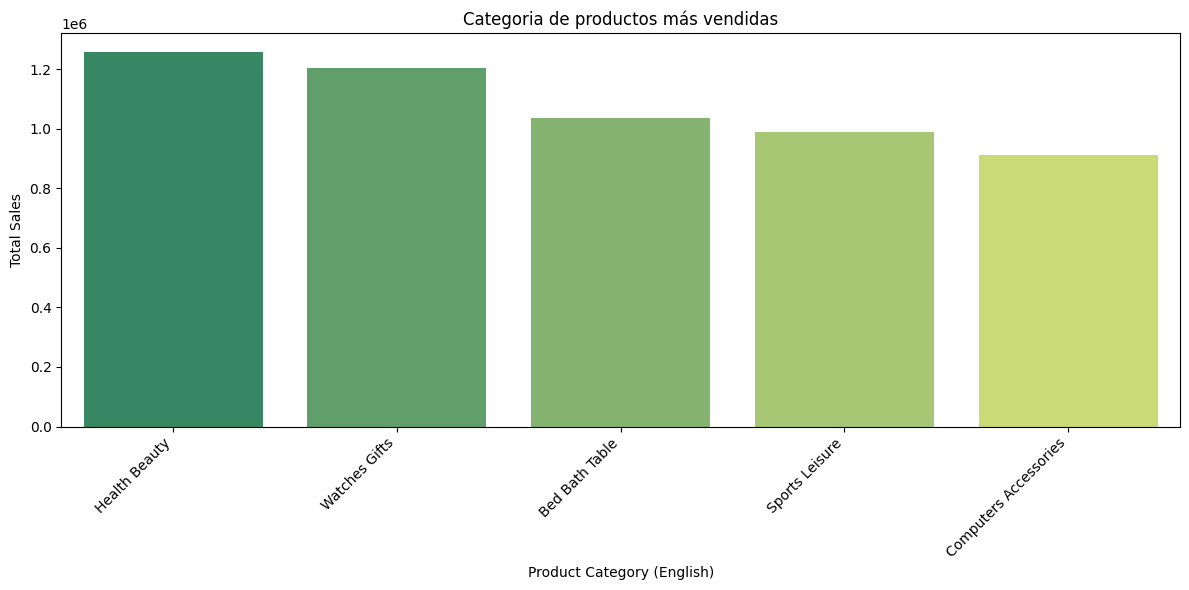

In [ ]:
## top 5 de la categoría de productos más vendidos en total- ok

# Combinar dataframes para obtener nombre de la categoría para cada ítem
order_items_with_product = pd.merge(order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')

# Combinar con nombres de categoría english
order_items_with_english_category = pd.merge(order_items_with_product, category, on='product_category_name', how='left')

# Calcular ventas por categoría de producto (inglés)
category_sales_english = order_items_with_english_category.groupby('product_category_name_english')['price'].sum().reset_index()
category_sales_english.columns = ['product_category_name_english', 'total_sales']

# Identificar las 5 categorías más vendidas
top_5_categories = category_sales_english.nlargest(5, 'total_sales')

# Visualizar las 5 categorías más vendidas
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name_english', y='total_sales', data=top_5_categories, palette='summer')
plt.title('Categoria de productos más vendidas')
plt.xlabel('Product Category (English)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task
Genera un gráfico de barras que muestre los 5 productos más vendidos en el estado de SP, utilizando los nombres de las categorías de productos en inglés.

## Filtrar datos para el estado de sp

### Subtask:
Seleccionar las órdenes y ítems de orden que corresponden a clientes en el estado de São Paulo (SP) utilizando el DataFrame `orders_customer_payment`.


**Reasoning**:
Filter the orders_customer_payment DataFrame to include only the rows where the customer_state is 'SP' and store the result in a new DataFrame called sp_orders_customer_payment.



In [ ]:
sp_orders_customer_payment = orders_customer_payment[orders_customer_payment['customer_state'] == 'SP'].copy()
display(sp_orders_customer_payment.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,last_order_date,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,2017-10-02 10:56:33,38.71
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,Santo Andre,SP,2018-02-13 21:18:39,28.62
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,299905e3934e9e181bfb2e164dd4b4f8,18075,Sorocaba,SP,2017-07-29 11:55:02,169.76
10,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-13 20:10:08,2017-07-14 18:43:29,2017-07-19 14:04:48,2017-08-08 00:00:00,782987b81c92239d922aa49d6bd4200b,4278,Sao Paulo,SP,2017-07-13 19:58:11,114.13
12,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,e2dfa3127fedbbca9707b36304996dab,4812,Sao Paulo,SP,2018-07-25 17:44:10,32.70


## Combinar datos de ítems de orden y productos

### Subtask:
Unir el DataFrame filtrado de ítems de orden con el DataFrame `products` para obtener el nombre de la categoría de producto para cada ítem.


**Reasoning**:
Filter the `sp_orders_customer_payment` DataFrame to get unique order-product combinations and then merge with the `products` DataFrame to get the product category name.



In [ ]:
sp_order_items = sp_orders_customer_payment[['order_id', 'customer_unique_id']].drop_duplicates()
sp_order_items_with_product = pd.merge(order_items, sp_order_items, on='order_id', how='inner')
sp_order_items_with_product = pd.merge(sp_order_items_with_product, products[['product_id', 'product_category_name']], on='product_id', how='left')
display(sp_order_items_with_product.head())
sp_order_items_with_product.info()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,product_category_name
0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,eb28e67c4c0b83846050ddfb8a35d051,Pet_Shop
1,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,af861d436cfc08b2c2ddefd0ba074622,Perfumaria
2,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,64b576fb70d441e8f1b2d7d446e483c5,Ferramentas_Jardim
3,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,635d9ac1680f03288e72ada3a1035803,Telefonia
4,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,fda4476abb6307ab3c415b7e6d026526,Ferramentas_Jardim


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46432 entries, 0 to 46431
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               46432 non-null  object 
 1   order_item_id          46432 non-null  int64  
 2   product_id             46432 non-null  object 
 3   seller_id              46432 non-null  object 
 4   shipping_limit_date    46432 non-null  object 
 5   price                  46432 non-null  float64
 6   freight_value          46432 non-null  float64
 7   customer_unique_id     46432 non-null  object 
 8   product_category_name  45809 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.2+ MB


## Combinar con nombres de categoría en inglés

### Subtask:
Unir el DataFrame resultante con el DataFrame `category` para obtener los nombres de las categorías en inglés.


**Reasoning**:
Merge the sp_order_items_with_product DataFrame with the category DataFrame to get the English product category names.



In [ ]:
sp_order_items_with_english_category = pd.merge(sp_order_items_with_product, category, on='product_category_name', how='left')
display(sp_order_items_with_english_category.head())
sp_order_items_with_english_category.info()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,product_category_name,product_category_name_english
0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,eb28e67c4c0b83846050ddfb8a35d051,Pet_Shop,Pet Shop
1,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,af861d436cfc08b2c2ddefd0ba074622,Perfumaria,Perfumery
2,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,64b576fb70d441e8f1b2d7d446e483c5,Ferramentas_Jardim,Garden Tools
3,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,635d9ac1680f03288e72ada3a1035803,Telefonia,Telephony
4,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,fda4476abb6307ab3c415b7e6d026526,Ferramentas_Jardim,Garden Tools


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46432 entries, 0 to 46431
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       46432 non-null  object 
 1   order_item_id                  46432 non-null  int64  
 2   product_id                     46432 non-null  object 
 3   seller_id                      46432 non-null  object 
 4   shipping_limit_date            46432 non-null  object 
 5   price                          46432 non-null  float64
 6   freight_value                  46432 non-null  float64
 7   customer_unique_id             46432 non-null  object 
 8   product_category_name          45809 non-null  object 
 9   product_category_name_english  45798 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.5+ MB


## Calcular ventas por producto

### Subtask:
Agrupar los datos combinados por `product_id` y `product_category_name_english` y calcular el monto total de ventas para cada producto en SP.


**Reasoning**:
Aggregate the data by product ID and English category name to calculate the total sales for each product in SP.



In [ ]:
product_sales_sp = sp_order_items_with_english_category.groupby(['product_id', 'product_category_name_english'])['price'].sum().reset_index()
product_sales_sp.columns = ['product_id', 'product_category_name_english', 'total_sales']
display(product_sales_sp.head())

,product_id,product_category_name_english,total_sales
0,00088930e925c41fd95ebfe695fd2655,Auto,129.9
1,0009406fd7479715e4bef61dd91f2462,Bed Bath Table,229.0
2,000d9be29b5207b54e86aa1b1ac54872,Watches Gifts,199.0
3,00126f27c813603687e6ce486d909d01,Cool Stuff,249.0
4,001795ec6f1b187d37335e1c4704762e,Consoles Games,233.4


## Identificar los 5 productos más vendidos en sp

### Subtask:
Seleccionar los 5 principales productos en función del monto total de ventas en SP.


**Reasoning**:
Sort the product_sales_sp DataFrame by total_sales in descending order and select the top 5 rows to identify the top 5 selling products by total sales in SP.



In [ ]:
top_5_selling_products_sp = product_sales_sp.sort_values(by='total_sales', ascending=False).head(5)
display(top_5_selling_products_sp)

,product_id,product_category_name_english,total_sales
13450,bb50f2e236e5eea0100680137654686c,Health Beauty,22280.00
11034,99a4788cb24856965c36a24e339b6058,Bed Bath Table,19862.78
12360,aca2eb7d00ea1a7b8ebd4e68314663af,Furniture Decor,18835.70
15413,d6160fb7873f184099d9bc95e30376af,Computers,15499.66
6952,5f504b3a1c75b73d6151be81eb05bdc9,Cool Stuff,15059.30


## Visualizar los 5 productos más vendidos en sp

### Subtask:
Crear un gráfico de barras para mostrar los 5 productos más vendidos en SP utilizando los nombres en inglés de sus categorías.


**Reasoning**:
Create a bar plot to visualize the top 5 selling product categories in SP based on total sales.



/tmp/ipython-input-1608605000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='total_sales', data=top_5_selling_products_sp, palette='summer')


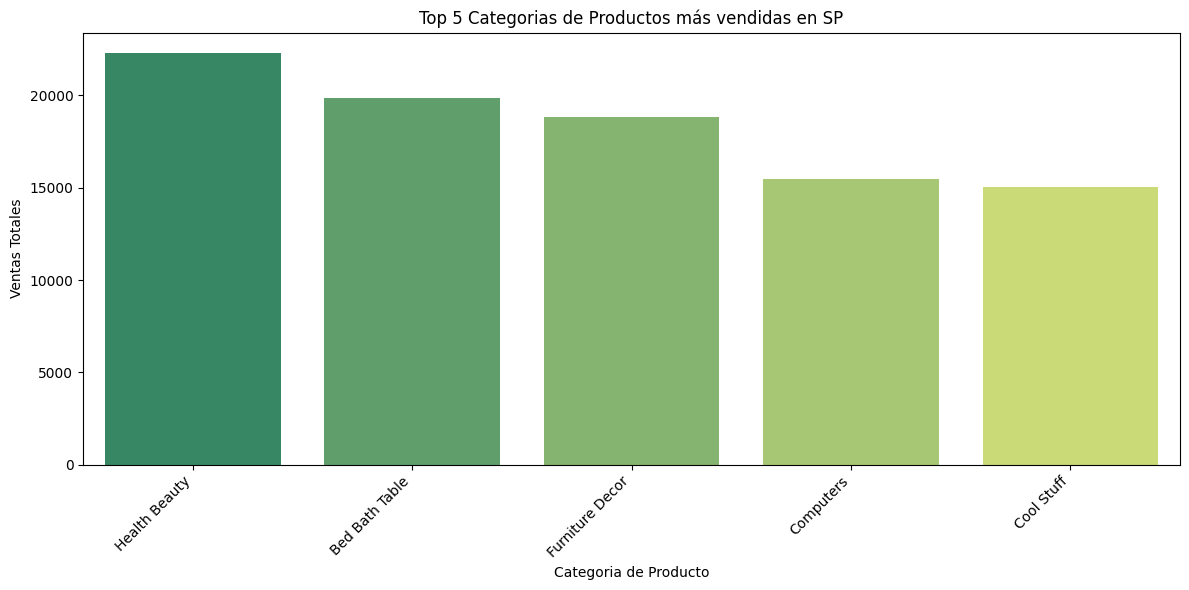

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name_english', y='total_sales', data=top_5_selling_products_sp, palette='summer')
plt.title('Top 5 Categorias de Productos más vendidas en SP')
plt.xlabel('Categoria de Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

* The top 5 selling product categories in the state of SP based on total sales are displayed in the generated bar plot. The specific categories and their sales amounts are shown in the `top_5_selling_products_sp` DataFrame.

### Insights or Next Steps

* Analyze the characteristics and customer demographics associated with the top-selling product categories in SP to understand the drivers of their success.
* Investigate the products within the top categories that contribute most to sales and explore potential strategies for further growth in these areas.


## GRAFICO DE TOP 5 DE LOS PRODUCTOS MAS VENDIDOS POR CIUDAD SAO PAULO

# Task
Genera un gráfico de barras que muestre los 5 productos más vendidos en la ciudad de São Paulo, utilizando los nombres de las categorías de productos en inglés.

## Filtrar datos para la ciudad de são paulo

### Subtask:
Seleccionar las órdenes y ítems de orden que corresponden a clientes en la ciudad de São Paulo ('sao paulo') utilizando el DataFrame `orders_customer_payment`.


**Reasoning**:
Filter the orders_customer_payment DataFrame to include only the rows where the customer_city is 'sao paulo' and store the result in a new DataFrame called sao_paulo_orders_customer_payment. Then display the head of the new DataFrame.



In [ ]:
sao_paulo_orders_customer_payment = orders_customer_payment[orders_customer_payment['customer_city'] == 'Sao Paulo'].copy()
display(sao_paulo_orders_customer_payment.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,last_order_date,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,2017-10-02 10:56:33,38.71
10,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-13 20:10:08,2017-07-14 18:43:29,2017-07-19 14:04:48,2017-08-08 00:00:00,782987b81c92239d922aa49d6bd4200b,4278,Sao Paulo,SP,2017-07-13 19:58:11,114.13
12,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,e2dfa3127fedbbca9707b36304996dab,4812,Sao Paulo,SP,2018-07-25 17:44:10,32.70
13,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,04cf8185c71090d28baa4407b2e6d600,5271,Sao Paulo,SP,2018-03-01 14:14:28,54.36
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,d699688533772c15a061e8ce81cb56df,4001,Sao Paulo,SP,2017-09-18 14:31:30,118.86


## Combinar datos de ítems de orden y productos

### Subtask:
Unir el DataFrame filtrado de ítems de orden con el DataFrame `products` para obtener el nombre de la categoría de producto para cada ítem.


**Reasoning**:
Filter the `sao_paulo_orders_customer_payment` DataFrame to get unique order-product combinations and then merge with the `products` DataFrame to get the product category name.



In [ ]:
sao_paulo_order_items = sao_paulo_orders_customer_payment[['order_id', 'customer_unique_id']].drop_duplicates()
sao_paulo_order_items_with_product = pd.merge(order_items, sao_paulo_order_items, on='order_id', how='inner')
sao_paulo_order_items_with_product = pd.merge(sao_paulo_order_items_with_product, products[['product_id', 'product_category_name']], on='product_id', how='left')
display(sao_paulo_order_items_with_product.head())
sao_paulo_order_items_with_product.info()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,product_category_name
0,000e63d38ae8c00bbcb5a30573b99628,1,553e0e7590d3116a072507a3635d2877,1c129092bf23f28a5930387c980c0dfc,2018-03-29 20:07:49,47.90,8.88,860fc00d3154ce2346c43ebe47b9b6ce,Cama_Mesa_Banho
1,0011d82c4b53e22e84023405fb467e57,1,c389f712c4b4510bc997cee93e8b1a28,bfd27a966d91cfaafdb25d076585f0da,2018-01-29 21:51:25,289.00,26.33,02daaa0e021d624d1784c4ea5cc84ace,Malas_Acessorios
2,001c85b5f68d2be0cb0797afc9e8ce9a,1,84f456958365164420cfc80fbe4c7fab,4a3ca9315b744ce9f8e9374361493884,2017-11-29 22:38:47,99.00,13.71,55a269f324455e78349e7b9b7e7e5911,Cama_Mesa_Banho
3,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78,870a0bdc769f9a7870309036740e79ea,Beleza_Saude
4,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78,870a0bdc769f9a7870309036740e79ea,Beleza_Saude


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17398 entries, 0 to 17397
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               17398 non-null  object 
 1   order_item_id          17398 non-null  int64  
 2   product_id             17398 non-null  object 
 3   seller_id              17398 non-null  object 
 4   shipping_limit_date    17398 non-null  object 
 5   price                  17398 non-null  float64
 6   freight_value          17398 non-null  float64
 7   customer_unique_id     17398 non-null  object 
 8   product_category_name  17117 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.2+ MB


**Reasoning**:
Merge the `sao_paulo_order_items_with_product` DataFrame with the `category` DataFrame to get the English product category names.



In [ ]:
sao_paulo_order_items_with_english_category = pd.merge(sao_paulo_order_items_with_product, category, on='product_category_name', how='left')
display(sao_paulo_order_items_with_english_category.head())
sao_paulo_order_items_with_english_category.info()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,product_category_name,product_category_name_english
0,000e63d38ae8c00bbcb5a30573b99628,1,553e0e7590d3116a072507a3635d2877,1c129092bf23f28a5930387c980c0dfc,2018-03-29 20:07:49,47.90,8.88,860fc00d3154ce2346c43ebe47b9b6ce,Cama_Mesa_Banho,Bed Bath Table
1,0011d82c4b53e22e84023405fb467e57,1,c389f712c4b4510bc997cee93e8b1a28,bfd27a966d91cfaafdb25d076585f0da,2018-01-29 21:51:25,289.00,26.33,02daaa0e021d624d1784c4ea5cc84ace,Malas_Acessorios,Luggage Accessories
2,001c85b5f68d2be0cb0797afc9e8ce9a,1,84f456958365164420cfc80fbe4c7fab,4a3ca9315b744ce9f8e9374361493884,2017-11-29 22:38:47,99.00,13.71,55a269f324455e78349e7b9b7e7e5911,Cama_Mesa_Banho,Bed Bath Table
3,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78,870a0bdc769f9a7870309036740e79ea,Beleza_Saude,Health Beauty
4,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78,870a0bdc769f9a7870309036740e79ea,Beleza_Saude,Health Beauty


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17398 entries, 0 to 17397
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       17398 non-null  object 
 1   order_item_id                  17398 non-null  int64  
 2   product_id                     17398 non-null  object 
 3   seller_id                      17398 non-null  object 
 4   shipping_limit_date            17398 non-null  object 
 5   price                          17398 non-null  float64
 6   freight_value                  17398 non-null  float64
 7   customer_unique_id             17398 non-null  object 
 8   product_category_name          17117 non-null  object 
 9   product_category_name_english  17116 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.3+ MB


## Calcular ventas por producto

### Subtask:
Agrupar los datos combinados por `product_id` y `product_category_name_english` y calcular el monto total de ventas para cada producto en la ciudad de São Paulo.

**Reasoning**:
Aggregate the data by product ID and English category name to calculate the total sales for each product in the city of São Paulo.

In [ ]:
product_sales_sao_paulo = sao_paulo_order_items_with_english_category.groupby(['product_id', 'product_category_name_english'])['price'].sum().reset_index()
product_sales_sao_paulo.columns = ['product_id', 'product_category_name_english', 'total_sales']
display(product_sales_sao_paulo.head())

,product_id,product_category_name_english,total_sales
0,0009406fd7479715e4bef61dd91f2462,Bed Bath Table,229.00
1,000d9be29b5207b54e86aa1b1ac54872,Watches Gifts,199.00
2,001795ec6f1b187d37335e1c4704762e,Consoles Games,155.60
3,001b237c0e9bb435f2e54071129237e9,Bed Bath Table,78.90
4,001b72dfd63e9833e8c02742adf472e3,Furniture Decor,139.96


## Identificar los 5 productos más vendidos en São Paulo

### Subtask:
Seleccionar los 5 principales productos en función del monto total de ventas en la ciudad de São Paulo.

**Reasoning**:
Sort the product_sales_sao_paulo DataFrame by total_sales in descending order and select the top 5 rows to identify the top 5 selling products by total sales in the city of São Paulo.

In [ ]:
top_5_selling_products_sao_paulo = product_sales_sao_paulo.sort_values(by='total_sales', ascending=False).head(5)
display(top_5_selling_products_sao_paulo)

,product_id,product_category_name_english,total_sales
6706,bb50f2e236e5eea0100680137654686c,Health Beauty,10160.00
6186,aca2eb7d00ea1a7b8ebd4e68314663af,Furniture Decor,7143.00
5554,99a4788cb24856965c36a24e339b6058,Bed Bath Table,6586.79
8884,f819f0c84a64f02d3a5606ca95edd272,Watches Gifts,6474.90
3494,5f504b3a1c75b73d6151be81eb05bdc9,Cool Stuff,6070.00


## Visualizar los 5 productos más vendidos en São Paulo

### Subtask:
Crear un gráfico de barras para mostrar los 5 productos más vendidos en la ciudad de São Paulo utilizando los nombres en inglés de sus categorías.

**Reasoning**:
Create a bar plot to visualize the top 5 selling product categories in the city of São Paulo based on total sales.

/tmp/ipython-input-4256701372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='total_sales', data=top_5_selling_products_sao_paulo, palette='summer')


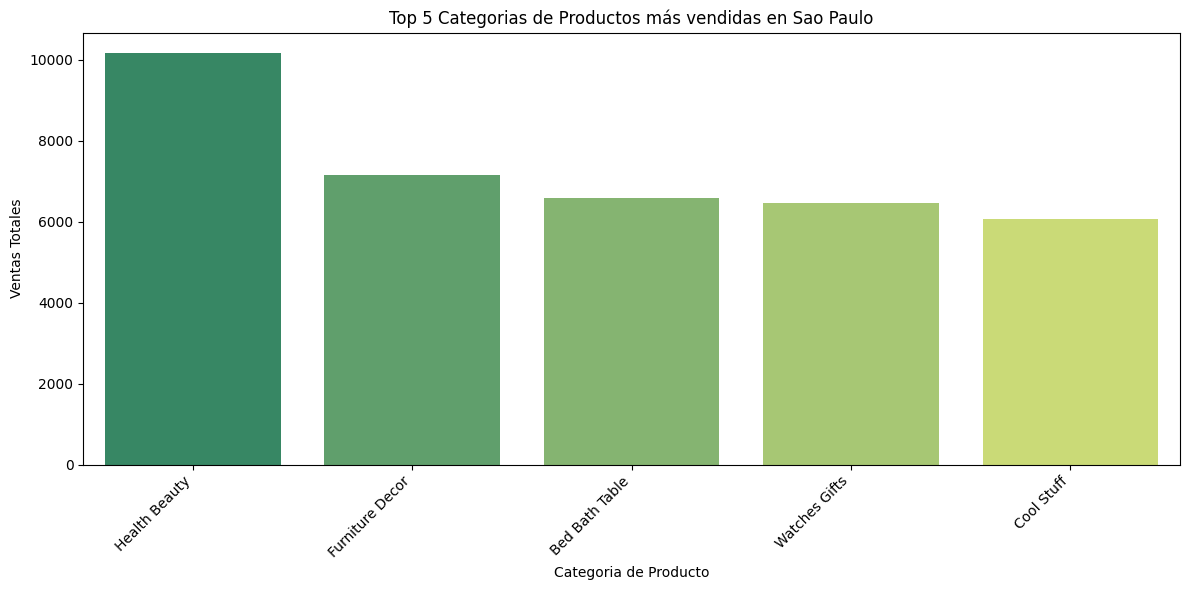

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name_english', y='total_sales', data=top_5_selling_products_sao_paulo, palette='summer')
plt.title('Top 5 Categorias de Productos más vendidas en Sao Paulo')
plt.xlabel('Categoria de Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

* The top 5 selling product categories in the city of São Paulo based on total sales are displayed in the generated bar plot. The specific categories and their sales amounts are shown in the `top_5_selling_products_sao_paulo` DataFrame.

### Insights or Next Steps

* Analyze the characteristics and customer demographics associated with the top-selling product categories in the city of São Paulo to understand the drivers of their success.
* Investigate the products within the top categories that contribute most to sales and explore potential strategies for further growth in these areas within São Paulo.

## grafico de los 3 productos mas comprados por los clientes de la catergoria  "clientes TOP" del dataset "customer_orders_total"

## Filtrar Clientes TOP

### Subtask:
Filtrar el DataFrame `customer_orders_total` para seleccionar solo los clientes clasificados como "Clientes TOP".

**Reasoning**:
Filter the `customer_orders_total` DataFrame to include only the rows where the 'categoria_cliente' is 'Clientes TOP' and store the result in a new DataFrame called `top_customers`. Display the head of the new DataFrame.

In [ ]:
top_customers = customer_orders_total[customer_orders_total['categoria_cliente'] == 'Clientes TOP'].copy()
display(top_customers.head())

,customer_unique_id,frecuencia,monto,last_order_date,recencia,R,F,M,R_label,F_label,M_label,categoria_frecuencia,RFM,categoria_cliente
3302,08e5b38d7948d37fbb2a59fc5e175ab1,4,1056.33,2018-05-10 03:38:27,111,"(-0.001, 113.0]","(0.999, 15.0]","(182.545, 13664.08]",4,1,4,3,434,Clientes TOP
6918,12d8b5ed661190a3a08183644dfc504d,4,857.95,2018-05-02 11:58:28,119,"(113.0, 218.0]","(0.999, 15.0]","(182.545, 13664.08]",3,1,4,3,334,Clientes TOP
10058,1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01,2018-02-14 13:22:12,196,"(113.0, 218.0]","(0.999, 15.0]","(182.545, 13664.08]",3,1,4,3,334,Clientes TOP
16773,2ddc001b620bd90d0f4378cfde1db887,4,483.33,2018-04-04 14:57:59,147,"(113.0, 218.0]","(0.999, 15.0]","(182.545, 13664.08]",3,1,4,3,334,Clientes TOP
19752,35ecdf6858edc6427223b64804cf028e,5,603.90,2018-03-31 21:18:49,150,"(113.0, 218.0]","(0.999, 15.0]","(182.545, 13664.08]",3,1,4,3,334,Clientes TOP


In [ ]:
top_customers["categoria_cliente"].value_counts()

,count
categoria_cliente,
Clientes TOP,37


## Combinar con órdenes y ítems de orden

> Añadir blockquote



### Subtask:
Unir el DataFrame de "Clientes TOP" con `orders_customer_payment` y `order_items` para obtener los ítems de orden comprados por estos clientes.

**Reasoning**:
Merge the `top_customers` DataFrame with `orders_customer_payment` on `customer_unique_id` to get the orders placed by top customers, then merge the result with `order_items` on `order_id` to get the order items.

In [ ]:
top_customer_orders = pd.merge(top_customers[['customer_unique_id']], orders_customer_payment[['customer_unique_id', 'order_id']], on='customer_unique_id', how='inner')
top_customer_order_items = pd.merge(top_customer_orders, order_items, on='order_id', how='inner')
display(top_customer_order_items.head())
top_customer_order_items.info()

,customer_unique_id,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,08e5b38d7948d37fbb2a59fc5e175ab1,eb2d13a05138994cbcc09986aabdb9b3,1,6d8096ca93caea3416a6b24bf411bc86,fa1c13f2614d7b5c4749cbc52fecda94,2018-03-08 02:30:49,319.90,35.00
1,08e5b38d7948d37fbb2a59fc5e175ab1,30d26db01f4ba88841bfbdbf5aaa8711,1,052413504e5295cd66ec4ced0b310062,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-14 04:55:18,178.00,51.75
2,08e5b38d7948d37fbb2a59fc5e175ab1,fe9d34568d9ac7651ff018def29da70f,1,ba74c6b75d2ad7503175809688d5a03c,7d13fca15225358621be4086e1eb0964,2018-05-17 02:57:34,178.99,41.40
3,08e5b38d7948d37fbb2a59fc5e175ab1,aa9f3738c923b9391c7e9c59eda6aad4,1,30360c8b0b2ac6918f53ab66bc3c306f,8ae520247981aa06bc94abddf5f46d34,2018-05-14 20:30:34,189.90,61.39
4,12d8b5ed661190a3a08183644dfc504d,3cab5c70f370e7fa810658c551f8e2ce,1,f3dc2177cd7a26726dd80204c34dbb48,cf2384dd2f1dddea3f838efed0945e65,2017-03-30 18:32:29,129.90,23.90


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_unique_id   257 non-null    object 
 1   order_id             257 non-null    object 
 2   order_item_id        257 non-null    int64  
 3   product_id           257 non-null    object 
 4   seller_id            257 non-null    object 
 5   shipping_limit_date  257 non-null    object 
 6   price                257 non-null    float64
 7   freight_value        257 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 16.2+ KB


## Combinar con información de categorías de productos

### Subtask:
Unir el DataFrame resultante con `products` para obtener los nombres de las categorías de productos y con `category` para obtener los nombres de las categorías en inglés.

**Reasoning**:
Merge the `top_customer_order_items` DataFrame with the `products` DataFrame to get the product category name, then merge the result with the `category` DataFrame to get the English product category name.

In [ ]:
top_customer_product_categories = pd.merge(top_customer_order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')
top_customer_product_categories = pd.merge(top_customer_product_categories, category, on='product_category_name', how='left')
display(top_customer_product_categories.head())
top_customer_product_categories.info()

,customer_unique_id,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,08e5b38d7948d37fbb2a59fc5e175ab1,eb2d13a05138994cbcc09986aabdb9b3,1,6d8096ca93caea3416a6b24bf411bc86,fa1c13f2614d7b5c4749cbc52fecda94,2018-03-08 02:30:49,319.90,35.00,Relogios_Presentes,Watches Gifts
1,08e5b38d7948d37fbb2a59fc5e175ab1,30d26db01f4ba88841bfbdbf5aaa8711,1,052413504e5295cd66ec4ced0b310062,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-14 04:55:18,178.00,51.75,Relogios_Presentes,Watches Gifts
2,08e5b38d7948d37fbb2a59fc5e175ab1,fe9d34568d9ac7651ff018def29da70f,1,ba74c6b75d2ad7503175809688d5a03c,7d13fca15225358621be4086e1eb0964,2018-05-17 02:57:34,178.99,41.40,Relogios_Presentes,Watches Gifts
3,08e5b38d7948d37fbb2a59fc5e175ab1,aa9f3738c923b9391c7e9c59eda6aad4,1,30360c8b0b2ac6918f53ab66bc3c306f,8ae520247981aa06bc94abddf5f46d34,2018-05-14 20:30:34,189.90,61.39,Relogios_Presentes,Watches Gifts
4,12d8b5ed661190a3a08183644dfc504d,3cab5c70f370e7fa810658c551f8e2ce,1,f3dc2177cd7a26726dd80204c34dbb48,cf2384dd2f1dddea3f838efed0945e65,2017-03-30 18:32:29,129.90,23.90,Moveis_Sala,Furniture Living Room


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_unique_id             257 non-null    object 
 1   order_id                       257 non-null    object 
 2   order_item_id                  257 non-null    int64  
 3   product_id                     257 non-null    object 
 4   seller_id                      257 non-null    object 
 5   shipping_limit_date            257 non-null    object 
 6   price                          257 non-null    float64
 7   freight_value                  257 non-null    float64
 8   product_category_name          250 non-null    object 
 9   product_category_name_english  250 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 20.2+ KB


## Calcular la cantidad de categorías de productos compradas

### Subtask:
Contar la frecuencia de compra de cada categoría de producto por los "Clientes TOP".

**Reasoning**:
Count the occurrences of each product category for the top customers.

In [ ]:
top_customer_category_counts = top_customer_product_categories['product_category_name_english'].value_counts().reset_index()
top_customer_category_counts.columns = ['product_category_name_english', 'count']
display(top_customer_category_counts.head())

,product_category_name_english,count
0,Bed Bath Table,29
1,Telephony,25
2,Sports Leisure,22
3,Furniture Decor,21
4,Watches Gifts,20


## Identificar las 3 categorías de productos más compradas

### Subtask:
Seleccionar las 3 categorías de productos con la mayor cantidad de compras por parte de los "Clientes TOP".

**Reasoning**:
Select the top 3 product categories with the highest purchase counts by top customers.

In [ ]:
top_3_top_customer_categories = top_customer_category_counts.nlargest(3, 'count')
display(top_3_top_customer_categories)

,product_category_name_english,count
0,Bed Bath Table,29
1,Telephony,25
2,Sports Leisure,22


## Visualizar las 3 categorías de productos más compradas

### Subtask:
Crear un gráfico de barras para mostrar las 3 categorías de productos más compradas por los "Clientes TOP" utilizando los nombres en inglés de sus categorías.

**Reasoning**:
Create a bar plot to visualize the top 3 most purchased product categories by top customers.

/tmp/ipython-input-1227871387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=top_3_top_customer_categories, palette='summer')


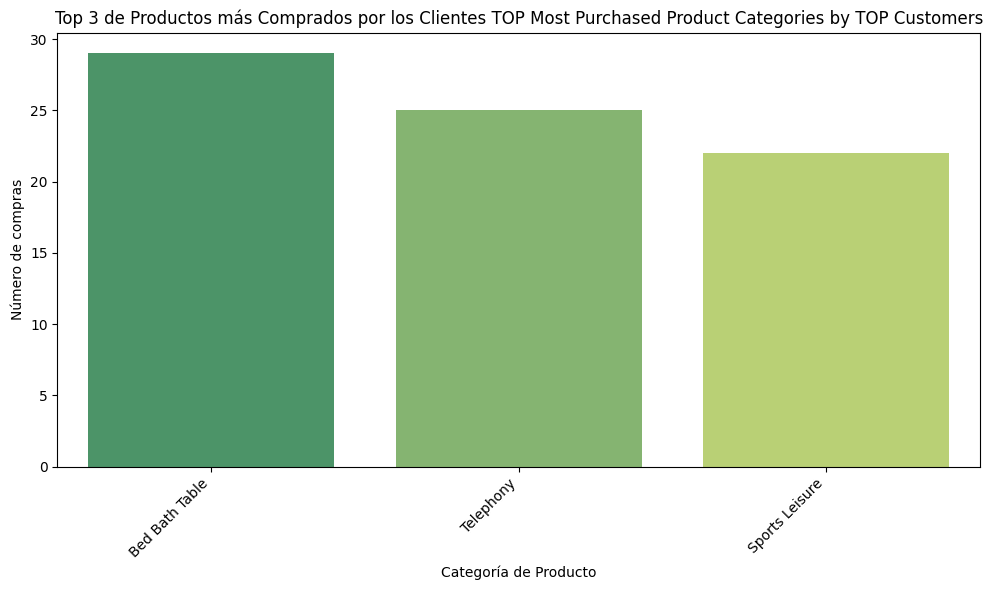

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category_name_english', y='count', data=top_3_top_customer_categories, palette='summer')
plt.title('Top 3 de Productos más Comprados por los Clientes TOP Most Purchased Product Categories by TOP Customers')
plt.xlabel('Categoría de Producto')
plt.ylabel('Número de compras')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Finish task

### Summary:

The top 3 product categories most frequently purchased by 'Clientes TOP' are displayed in the bar plot.

### Insights or Next Steps:

* Analyze the characteristics and specific products within these top 3 categories that appeal most to 'Clientes TOP'.
* Develop targeted marketing campaigns or promotions for these categories to further engage and reward 'Clientes TOP'.
* Explore if there are any patterns in the purchase behavior of 'Clientes TOP' within these categories (e.g., purchase frequency, average order value).

## categoria de clientes monto alto - productos mas vendidos

## Filtrar Clientes Monto Alto

### Subtask:
Filtrar el DataFrame `customer_orders_total` para seleccionar solo los clientes clasificados como "Clientes monto alto".

**Reasoning**:
Filter the `customer_orders_total` DataFrame to include only the rows where the 'categoria_cliente' is 'Clientes monto alto' and store the result in a new DataFrame called `high_value_customers`. Display the head of the new DataFrame.

In [ ]:
high_value_customers = customer_orders_total[customer_orders_total['categoria_cliente'] == 'Clientes monto alto'].copy()
display(high_value_customers.head())

,customer_unique_id,frecuencia,monto,last_order_date,recencia,R,F,M,R_label,F_label,M_label,categoria_frecuencia,RFM,categoria_cliente
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,2017-11-14 19:45:42,287,"(218.0, 345.0]","(0.999, 15.0]","(182.545, 13664.08]",2,1,4,1,214,Clientes monto alto
18,000de6019bb59f34c099a907c151d855,1,257.44,2017-08-17 19:10:33,376,"(345.0, 694.0]","(0.999, 15.0]","(182.545, 13664.08]",1,1,4,1,114,Clientes monto alto
23,0010a452c6d13139e50b57f19f52e04e,1,325.93,2017-07-11 11:22:43,414,"(345.0, 694.0]","(0.999, 15.0]","(182.545, 13664.08]",1,1,4,1,114,Clientes monto alto
25,001147e649a7b1afd577e873841632dd,1,212.16,2017-08-31 17:12:56,362,"(345.0, 694.0]","(0.999, 15.0]","(182.545, 13664.08]",1,1,4,1,114,Clientes monto alto
27,0011805441c0d1b68b48002f1d005526,1,297.14,2017-04-24 13:36:48,492,"(345.0, 694.0]","(0.999, 15.0]","(182.545, 13664.08]",1,1,4,1,114,Clientes monto alto


## Combinar con órdenes y ítems de orden

### Subtask:
Unir el DataFrame de "Clientes monto alto" con `orders_customer_payment` y `order_items` para obtener los ítems de orden comprados por estos clientes.

**Reasoning**:
Merge the `high_value_customers` DataFrame with `orders_customer_payment` on `customer_unique_id` to get the orders placed by high value customers, then merge the result with `order_items` on `order_id` to get the order items.

In [ ]:
high_value_customer_orders = pd.merge(high_value_customers[['customer_unique_id']], orders_customer_payment[['customer_unique_id', 'order_id']], on='customer_unique_id', how='inner')
high_value_customer_order_items = pd.merge(high_value_customer_orders, order_items, on='order_id', how='inner')
display(high_value_customer_order_items.head())
high_value_customer_order_items.info()

,customer_unique_id,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,1,c72e18b3fe2739b8d24ebf3102450f37,70a12e78e608ac31179aea7f8422044b,2017-11-22 20:06:52,180.0,16.89
1,000de6019bb59f34c099a907c151d855,c6d61340bd8baeedca7cc8e7f7ec07e9,1,af0a917aec9cea3b353ece61a8825326,da8622b14eb17ae2831f4ac5b9dab84a,2017-08-23 19:55:22,89.9,10.31
2,000de6019bb59f34c099a907c151d855,c6d61340bd8baeedca7cc8e7f7ec07e9,2,9e572ff4654f7064419d97a891a8b0fc,da8622b14eb17ae2831f4ac5b9dab84a,2017-08-23 19:55:22,139.9,17.33
3,0010a452c6d13139e50b57f19f52e04e,57caee5837cc4a8f605f3a83bff208db,1,c7796bc610cc40ed7935b75fced0aa0e,7dc8c42cc750eeafea6c85712ffee9bf,2017-07-25 11:30:28,299.0,26.93
4,001147e649a7b1afd577e873841632dd,533dbcda0a703be171113573af8b3467,1,bdb4be6ce2f7f2b5be0a16088028c7fc,955fee9216a65b617aa5c0531780ce60,2017-09-08 17:25:15,85.0,21.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_unique_id   15910 non-null  object 
 1   order_id             15910 non-null  object 
 2   order_item_id        15910 non-null  int64  
 3   product_id           15910 non-null  object 
 4   seller_id            15910 non-null  object 
 5   shipping_limit_date  15910 non-null  object 
 6   price                15910 non-null  float64
 7   freight_value        15910 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 994.5+ KB


## Combinar con información de categorías de productos

### Subtask:
Unir el DataFrame resultante con `products` para obtener los nombres de las categorías de productos y con `category` para obtener los nombres de las categorías en inglés.

**Reasoning**:
Merge the `high_value_customer_order_items` DataFrame with the `products` DataFrame to get the product category name, then merge the result with the `category` DataFrame to get the English product category name.

In [ ]:
high_value_customer_product_categories = pd.merge(high_value_customer_order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')
high_value_customer_product_categories = pd.merge(high_value_customer_product_categories, category, on='product_category_name', how='left')
display(high_value_customer_product_categories.head())
high_value_customer_product_categories.info()

,customer_unique_id,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,1,c72e18b3fe2739b8d24ebf3102450f37,70a12e78e608ac31179aea7f8422044b,2017-11-22 20:06:52,180.0,16.89,Telefonia,Telephony
1,000de6019bb59f34c099a907c151d855,c6d61340bd8baeedca7cc8e7f7ec07e9,1,af0a917aec9cea3b353ece61a8825326,da8622b14eb17ae2831f4ac5b9dab84a,2017-08-23 19:55:22,89.9,10.31,Cama_Mesa_Banho,Bed Bath Table
2,000de6019bb59f34c099a907c151d855,c6d61340bd8baeedca7cc8e7f7ec07e9,2,9e572ff4654f7064419d97a891a8b0fc,da8622b14eb17ae2831f4ac5b9dab84a,2017-08-23 19:55:22,139.9,17.33,Cama_Mesa_Banho,Bed Bath Table
3,0010a452c6d13139e50b57f19f52e04e,57caee5837cc4a8f605f3a83bff208db,1,c7796bc610cc40ed7935b75fced0aa0e,7dc8c42cc750eeafea6c85712ffee9bf,2017-07-25 11:30:28,299.0,26.93,Casa_Conforto,Home Confort
4,001147e649a7b1afd577e873841632dd,533dbcda0a703be171113573af8b3467,1,bdb4be6ce2f7f2b5be0a16088028c7fc,955fee9216a65b617aa5c0531780ce60,2017-09-08 17:25:15,85.0,21.08,Utilidades_Domesticas,Housewares


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_unique_id             15910 non-null  object 
 1   order_id                       15910 non-null  object 
 2   order_item_id                  15910 non-null  int64  
 3   product_id                     15910 non-null  object 
 4   seller_id                      15910 non-null  object 
 5   shipping_limit_date            15910 non-null  object 
 6   price                          15910 non-null  float64
 7   freight_value                  15910 non-null  float64
 8   product_category_name          15698 non-null  object 
 9   product_category_name_english  15698 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.2+ MB


## Calcular la cantidad de categorías de productos compradas

### Subtask:
Contar la frecuencia de compra de cada categoría de producto por los "Clientes monto alto".

**Reasoning**:
Count the occurrences of each product category for the high value customers.

In [ ]:
high_value_customer_category_counts = high_value_customer_product_categories['product_category_name_english'].value_counts().reset_index()
high_value_customer_category_counts.columns = ['product_category_name_english', 'count']
display(high_value_customer_category_counts.head())

,product_category_name_english,count
0,Bed Bath Table,1652
1,Furniture Decor,1339
2,Computers Accessories,1204
3,Sports Leisure,1169
4,Watches Gifts,1102


## Identificar las 3 categorías de productos más compradas

### Subtask:
Seleccionar las 3 categorías de productos con la mayor cantidad de compras por parte de los "Clientes monto alto".

**Reasoning**:
Select the top 3 product categories with the highest purchase counts by high value customers.

In [ ]:
top_3_high_value_customer_categories = high_value_customer_category_counts.nlargest(3, 'count')
display(top_3_high_value_customer_categories)

,product_category_name_english,count
0,Bed Bath Table,1652
1,Furniture Decor,1339
2,Computers Accessories,1204


## Visualizar las 3 categorías de productos más compradas

### Subtask:
Crear un gráfico de barras para mostrar las 3 categorías de productos más compradas por los "Clientes monto alto" utilizando los nombres en inglés de sus categorías.

**Reasoning**:
Create a bar plot to visualize the top 3 most purchased product categories by high value customers.

/tmp/ipython-input-4062829230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=top_3_high_value_customer_categories, palette='summer')


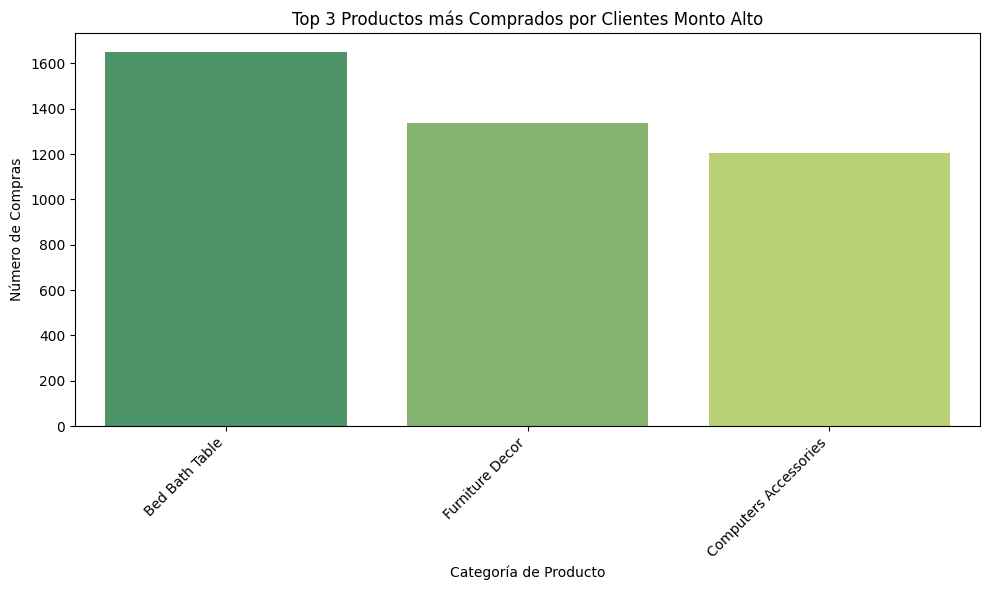

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category_name_english', y='count', data=top_3_high_value_customer_categories, palette='summer')
plt.title('Top 3 Productos más Comprados por Clientes Monto Alto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Finish task

### Summary:

The top 3 product categories most frequently purchased by 'Clientes monto alto' are displayed in the bar plot.

### Insights or Next Steps:

* Analyze the characteristics and specific products within these top 3 categories that appeal most to 'Clientes monto alto'.
* Develop targeted marketing campaigns or promotions for these categories to further engage and reward 'Clientes monto alto'.
* Explore if there are any patterns in the purchase behavior of 'Clientes monto alto' within these categories (e.g., purchase frequency, average order value).

In [ ]:
customer_orders_total['categoria_cliente'].value_counts()

,count
categoria_cliente,
Clientes intermedios,34556
Clientes potenciales,23879
Clientes perdidos,12059
Clientes monto alto,11407
Clientes recientes,11388
Clientes TOP,37
Clientes buenos gastadores,9


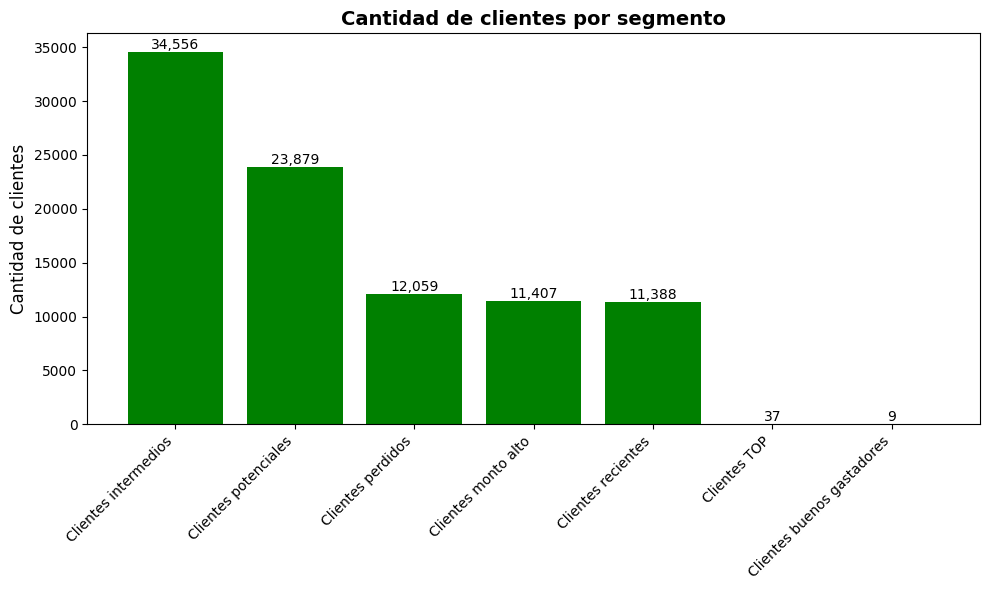

In [ ]:
# Conteo por categoría de cliente
conteo_segmentos = customer_orders_total["categoria_cliente"] \
    .value_counts() \
    .rename_axis("segmento") \
    .reset_index(name="cantidad")

# Crear gráfico
plt.figure(figsize=(10,6))
bars = plt.bar(conteo_segmentos["segmento"], conteo_segmentos["cantidad"], color="Green")

# Títulos y etiquetas
plt.title("Cantidad de clientes por segmento", fontsize=14, fontweight="bold")
plt.ylabel("Cantidad de clientes", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Agregar valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2784029303.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=top_3_monto_alto_customer_categories, palette='summer')


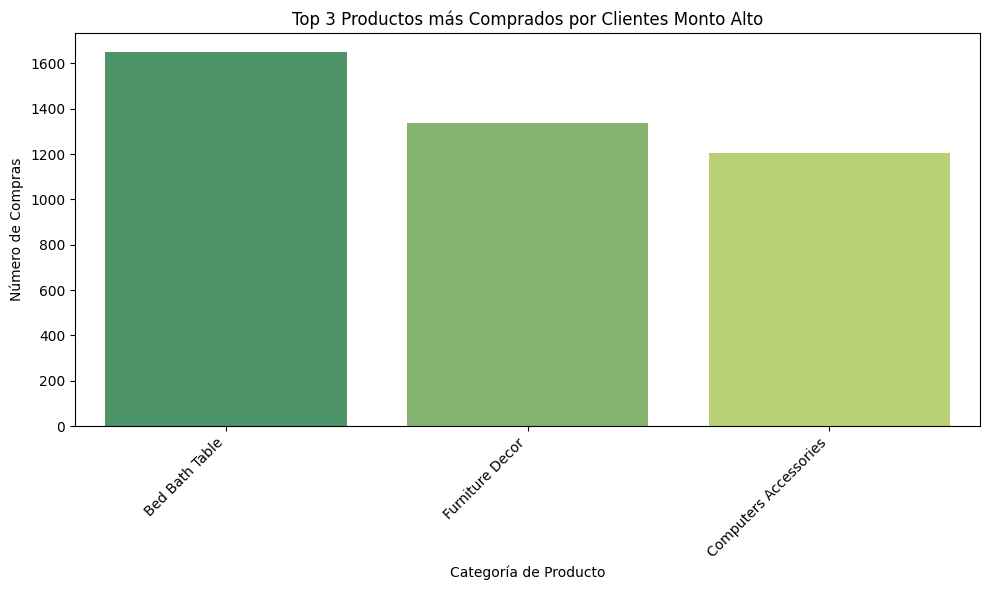

In [ ]:
# Top 3 de los productos más comprados por clientes Monto Alto - RFM
monto_alto_customers = customer_orders_total[customer_orders_total['categoria_cliente'] == 'Clientes monto alto'].copy()

monto_alto_customer_orders = pd.merge(monto_alto_customers[['customer_unique_id']], orders_customer_payment[['customer_unique_id', 'order_id']], on='customer_unique_id', how='inner')
monto_alto_customer_order_items = pd.merge(monto_alto_customer_orders, order_items, on='order_id', how='inner')

monto_alto_customer_product_categories = pd.merge(monto_alto_customer_order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')
monto_alto_customer_product_categories = pd.merge(monto_alto_customer_product_categories, category, on='product_category_name', how='left')

monto_alto_customer_category_counts = monto_alto_customer_product_categories['product_category_name_english'].value_counts().reset_index()
monto_alto_customer_category_counts.columns = ['product_category_name_english', 'count']

top_3_monto_alto_customer_categories = monto_alto_customer_category_counts.nlargest(3, 'count')

plt.figure(figsize=(10, 6))
sns.barplot(x='product_category_name_english', y='count', data=top_3_monto_alto_customer_categories, palette='summer')
plt.title('Top 3 Productos más Comprados por Clientes Monto Alto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1796540764.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=top_3_potenciales_customer_categories, palette='summer')


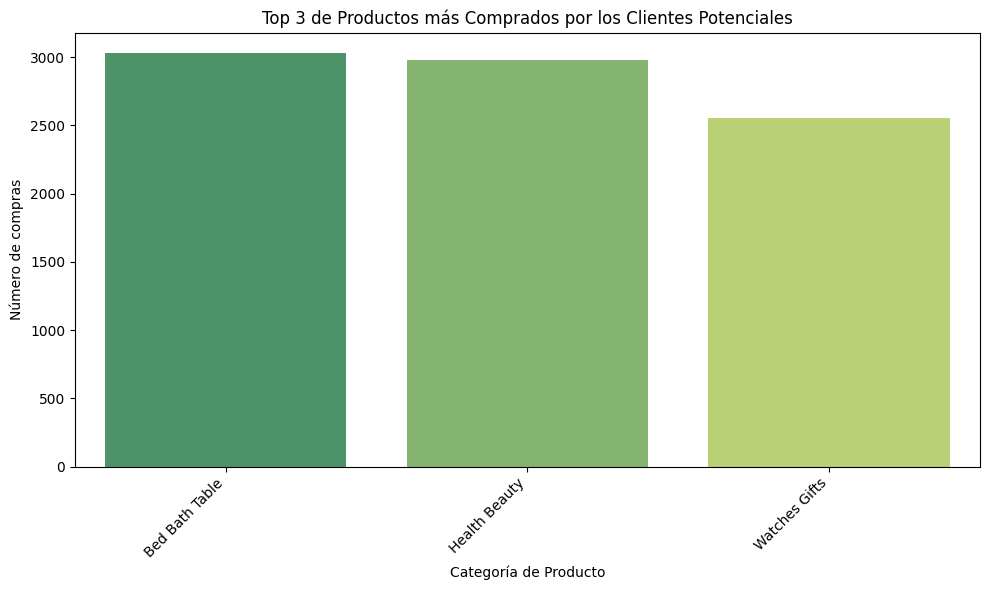

In [ ]:
#Crear dataset unicamente de clientes Potenciales
potenciales_customers = customer_orders_total[customer_orders_total['categoria_cliente'] == 'Clientes potenciales'].copy()

#Combinar con órdenes y ítems de orden
potenciales_customer_orders = pd.merge(potenciales_customers[['customer_unique_id']], orders_customer_payment[['customer_unique_id', 'order_id']], on='customer_unique_id', how='inner')
potenciales_customer_order_items = pd.merge(potenciales_customer_orders, order_items, on='order_id', how='inner')

#Combinar con información de categorías de productos
potenciales_customer_product_categories = pd.merge(potenciales_customer_order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')
potenciales_customer_product_categories = pd.merge(potenciales_customer_product_categories, category, on='product_category_name', how='left')

#Contar la frecuencia de compra de cada categoría de producto por los Clientes TOP
potenciales_customer_category_counts = potenciales_customer_product_categories['product_category_name_english'].value_counts().reset_index()
potenciales_customer_category_counts.columns = ['product_category_name_english', 'count']

#Identificar las 3 categorías de productos más compradas
top_3_potenciales_customer_categories = potenciales_customer_category_counts.nlargest(3, 'count')

#Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category_name_english', y='count', data=top_3_potenciales_customer_categories, palette='summer')
plt.title('Top 3 de Productos más Comprados por los Clientes Potenciales')
plt.xlabel('Categoría de Producto')
plt.ylabel('Número de compras')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

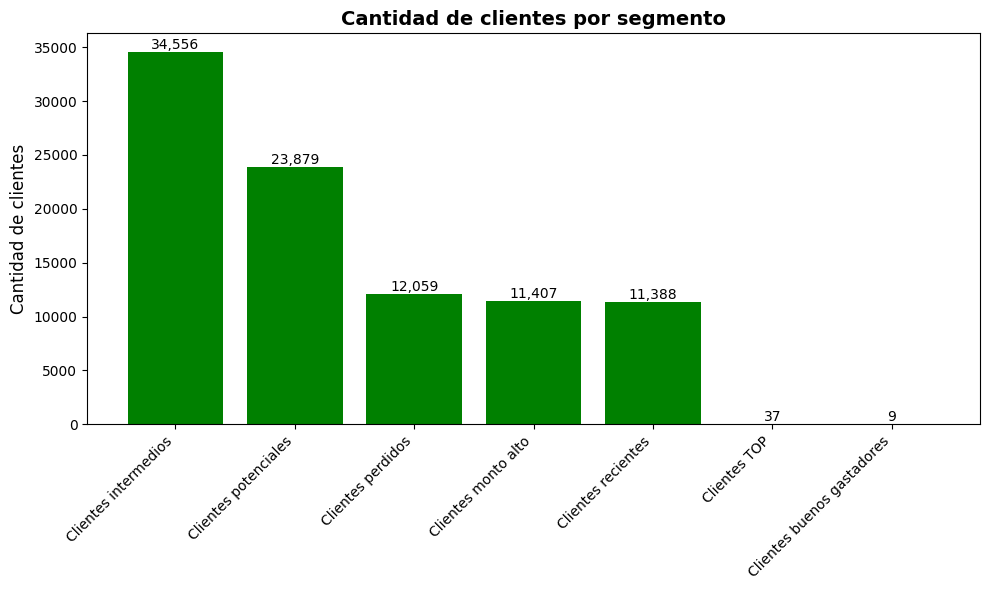

In [ ]:
# Conteo por categoría de cliente
conteo_segmentos = customer_orders_total["categoria_cliente"] \
    .value_counts() \
    .rename_axis("segmento") \
    .reset_index(name="cantidad")

# Crear gráfico
plt.figure(figsize=(10,6))
bars = plt.bar(conteo_segmentos["segmento"], conteo_segmentos["cantidad"], color="Green")

# Títulos y etiquetas
plt.title("Cantidad de clientes por segmento", fontsize=14, fontweight="bold")
plt.ylabel("Cantidad de clientes", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Agregar valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()